# 2.3 지도 학습 알고리즘

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [5]:
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

set_matplotlib_formats('retina')

In [15]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------

X.shape :  (26, 2)


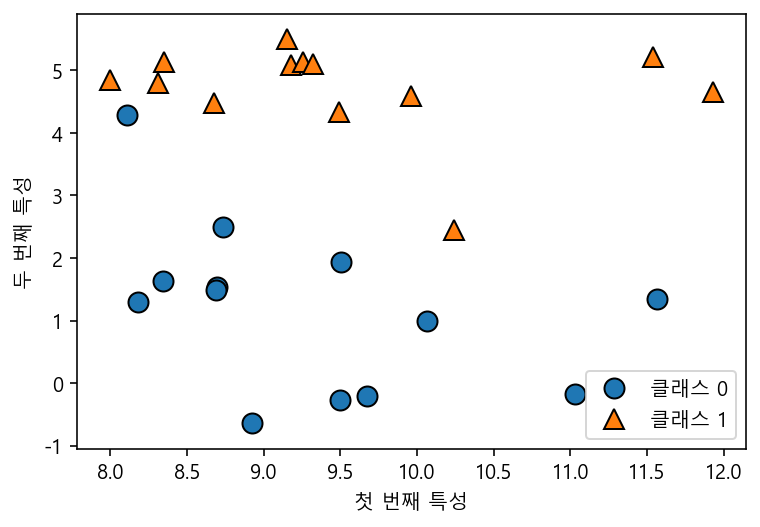

In [17]:
# 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
print('X.shape : ', X.shape)
# plt.show()

Text(0, 0.5, '타깃')

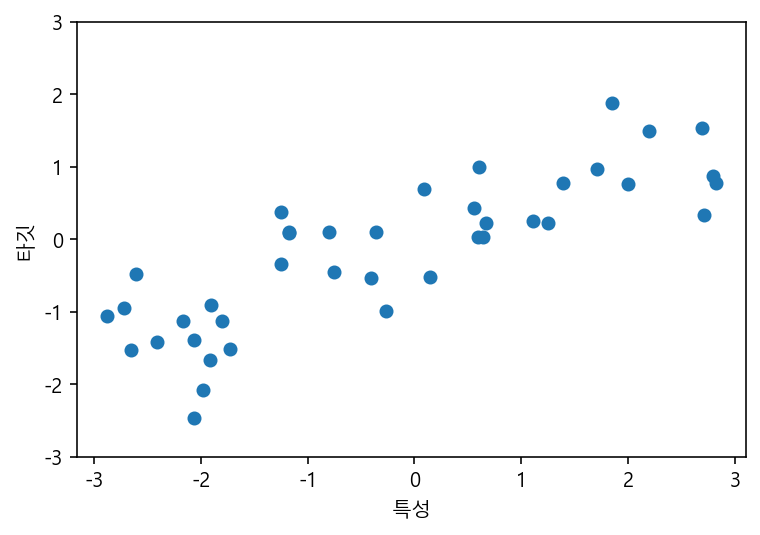

In [18]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

Text(0, 0.5, '타깃')

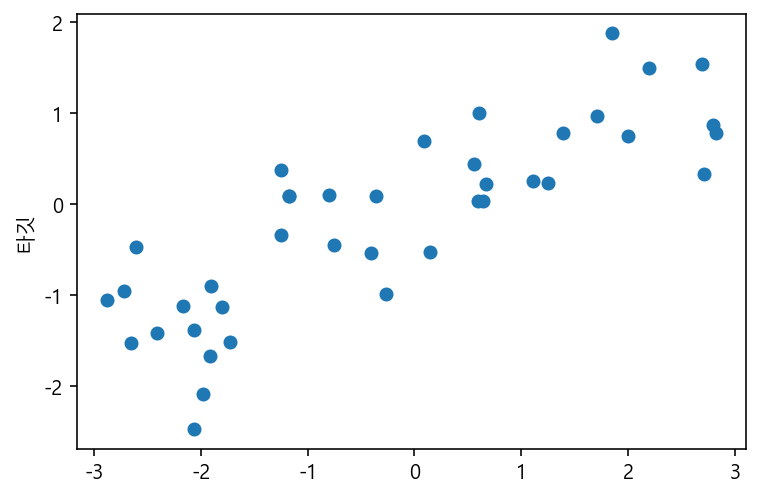

In [21]:
X,y = mglearn.datasets.make_wave(n_samples=40) #40개의 임의의 X,y 축을 갖는 좌표 생성
plt.plot(X,y,'o')
# plt.ylim(-3,3)
# plt.xlabel('특성')
plt.ylabel('타깃')

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys() : \n',cancer.keys())

cancer.keys() : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [29]:
print('유방암 데이터의 형태 : ', type(cancer.data))
print('유방암 데이터의 형태 : ', cancer.data.shape)

유방암 데이터의 형태 :  <class 'numpy.ndarray'>
유방암 데이터의 형태 :  (569, 30)


In [38]:
print('클래스별 샘플 개수 : \n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [39]:
print('특성이름 : \n', cancer.feature_names)

특성이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


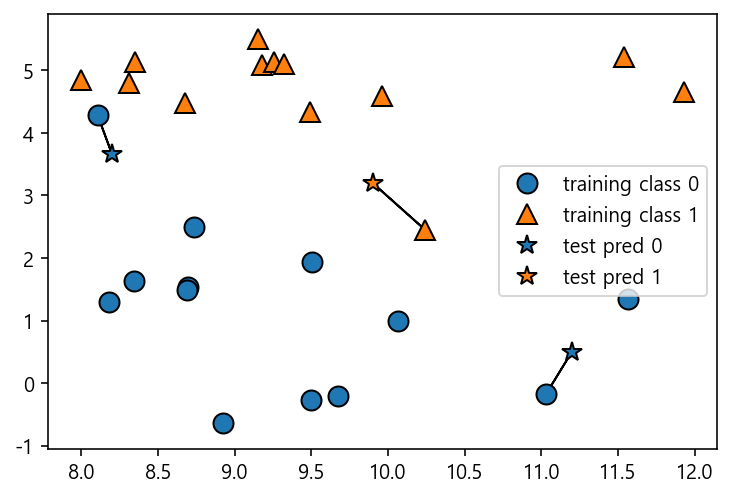

In [43]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

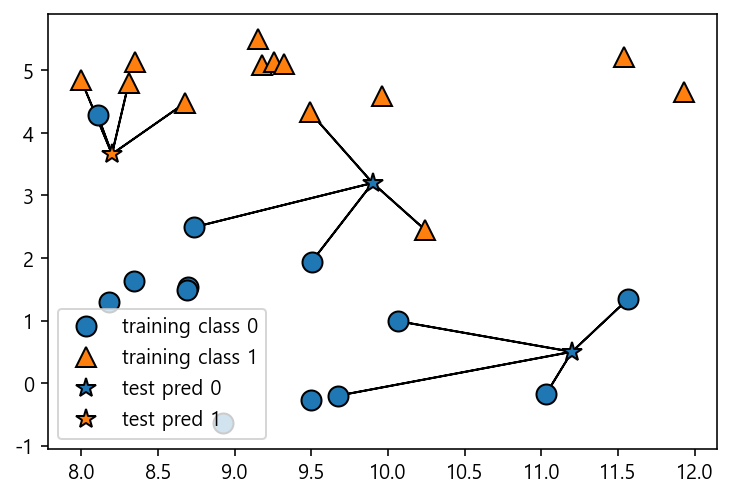

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [50]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
print('테스트 세트 예측 : ', clf.predict(X_test))

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [55]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


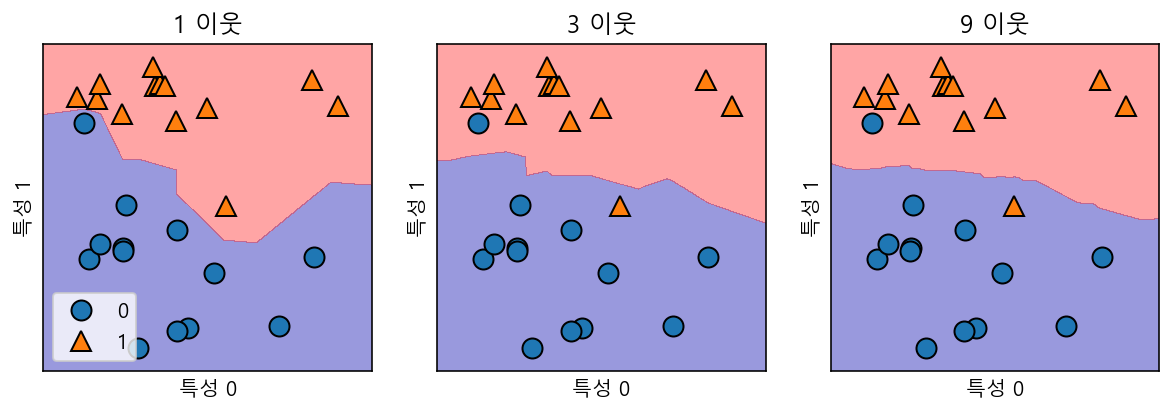

In [73]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

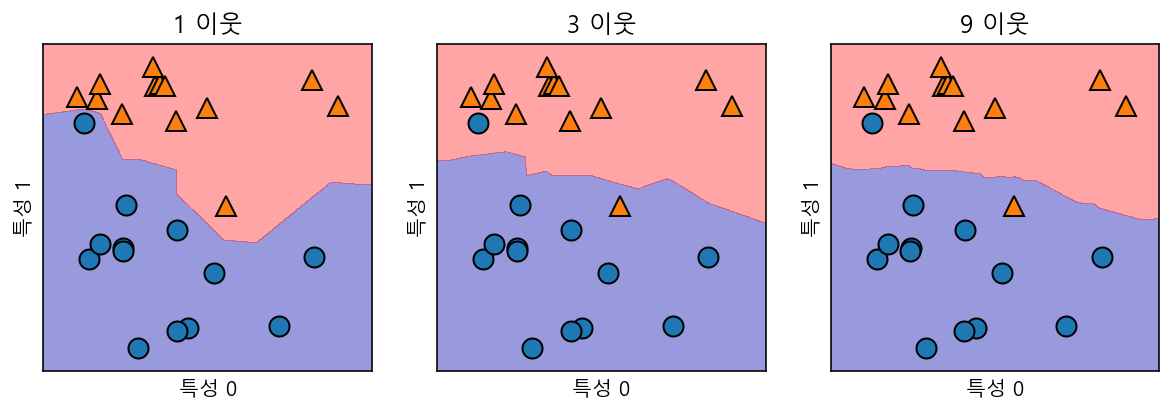

In [79]:
# 번형

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,3,figsize=(10,3))

for i, axes in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=axes, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=axes)
    
    axes.set_title('{} 이웃'.format(i))
    axes.set_xlabel('특성 0')
    axes.set_ylabel('특성 1')

# axes[0].legend(loc=3)

< zip 예시 >
- zip : 동일한 개수로 이루어진 자료형을 묶어주는 함수 (개수 달라도 묶을 수 있음)

In [80]:
name = ['Lee', 'Kim', 'Park', 'Han', 'Choi']
score = [95,96,97,94]

for name, score in zip(name, score):
    print(name, score)

Lee 95
Kim 96
Park 97
Han 94


In [95]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

#  stratify : 비율을 유지하여 분할 >> 발암 환자의 비율을 분할 후에도 유지하기 위해 적용
#  random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정 -> 같은 결과값이 나오도록

In [96]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

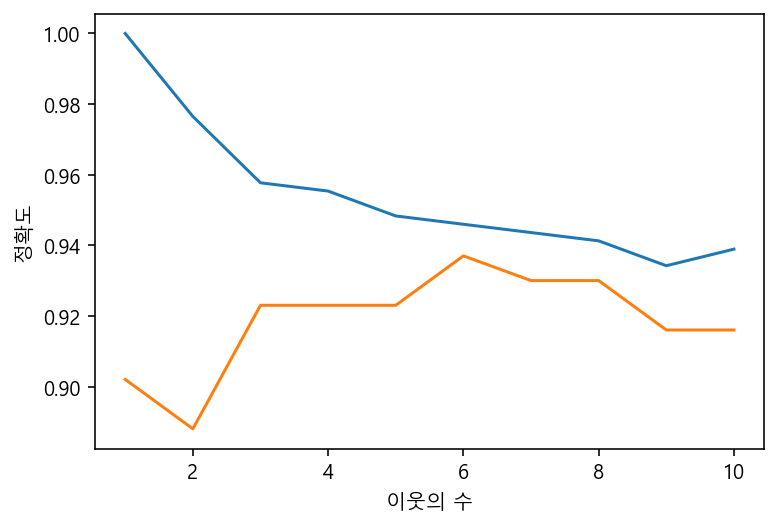

In [97]:
for n_neighbors in neighbors_settings : 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('이웃의 수')
plt.legend
plt.show()

## k-최근접 이웃 회귀

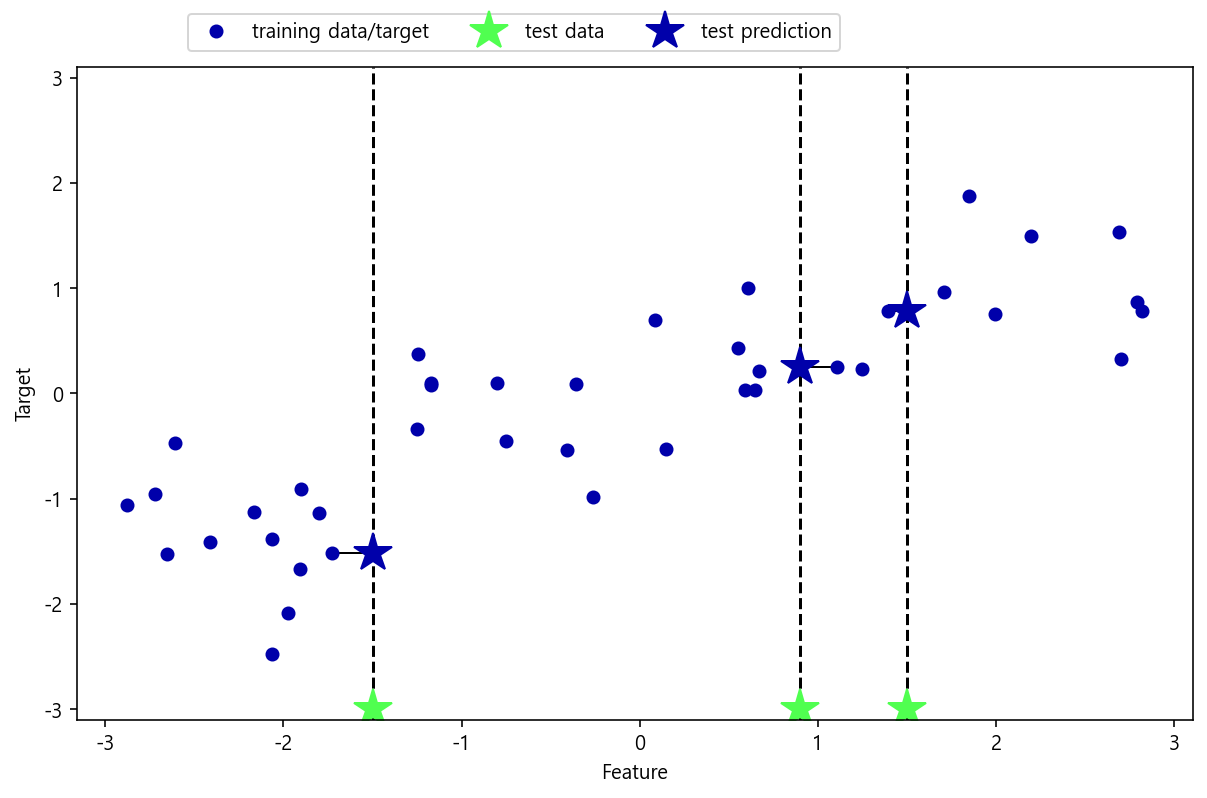

In [103]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

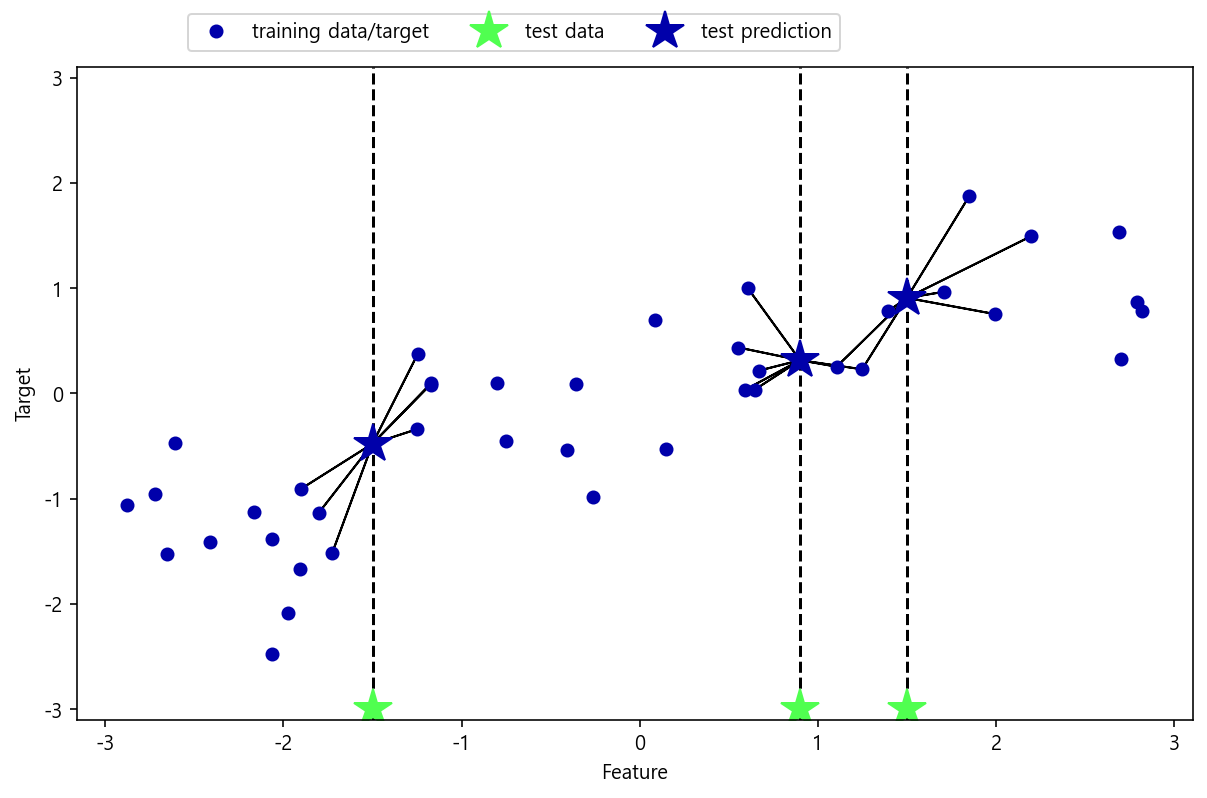

In [106]:
mglearn.plots.plot_knn_regression(n_neighbors=7)

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [119]:
print('테스트 세트 예측 : ', reg.predict(X_test))

테스트 세트 예측 :  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [120]:
print('테스트 세트 R 결정계수 : {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 R 결정계수 : 0.83


In [121]:
72p 코드

SyntaxError: invalid syntax (<ipython-input-121-487e0cf45c51>, line 1)

## 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


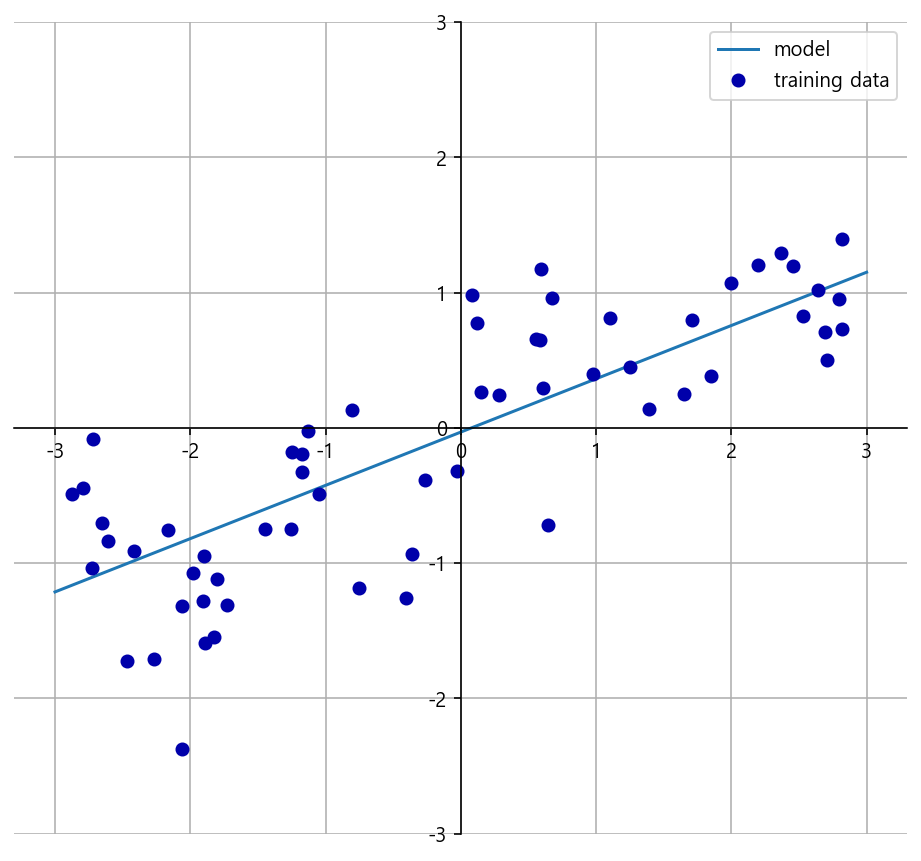

In [124]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀(최소 제곱법)

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [128]:
lr.coef_

array([0.39390555])

In [129]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


> train 데이터와 test 데이터의 R2 점수 차이가 거의 같다 -> 과소 적합 상태임을 의미 

In [ ]:
Boston housing(extended) 데이터로 살펴보기

In [133]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [134]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


> train 데이터와 test 데이터의 R2 점수 차이가 매우 크다 -> 과대 적합 상태임을 의미

## 리지 회귀

In [135]:
from sklearn.linear_model import Ridge

In [137]:
ridge = Ridge().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


### ▼ alpha 값 조정

In [138]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [139]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


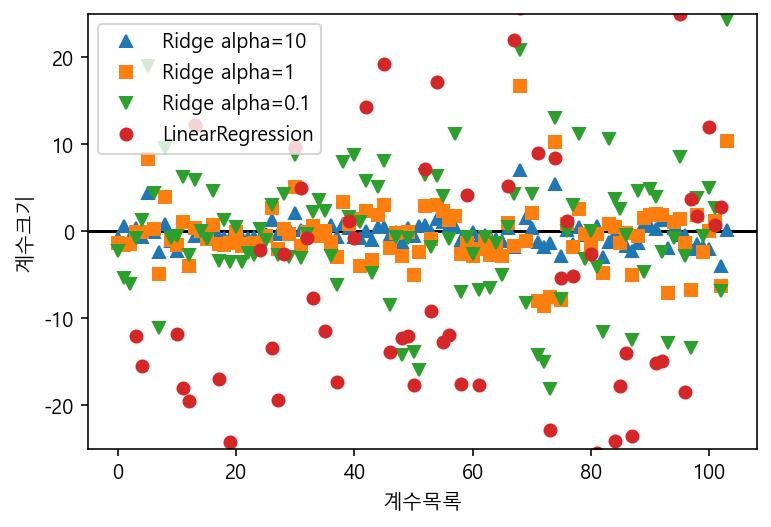

In [153]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수목록')
plt.ylabel('계수크기')

xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

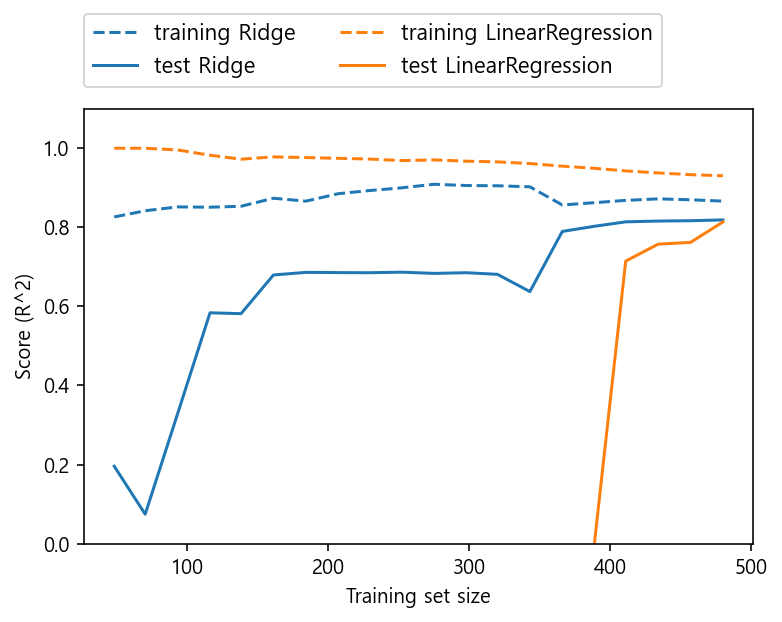

In [145]:
mglearn.plots.plot_ridge_n_samples()

## 라소

In [146]:
from sklearn.linear_model import Lasso

In [148]:
lasso = Lasso().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso.coef_!=0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


In [150]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) #alpha의 default는 1.0

print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso001.coef_!=0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33


In [152]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) #alpha의 default는 1.0

print('훈련 세트 점수 : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso00001.coef_!=0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96


▶ 0.01보다 정확도가 낮아졌다. >> 과대 적합 발생

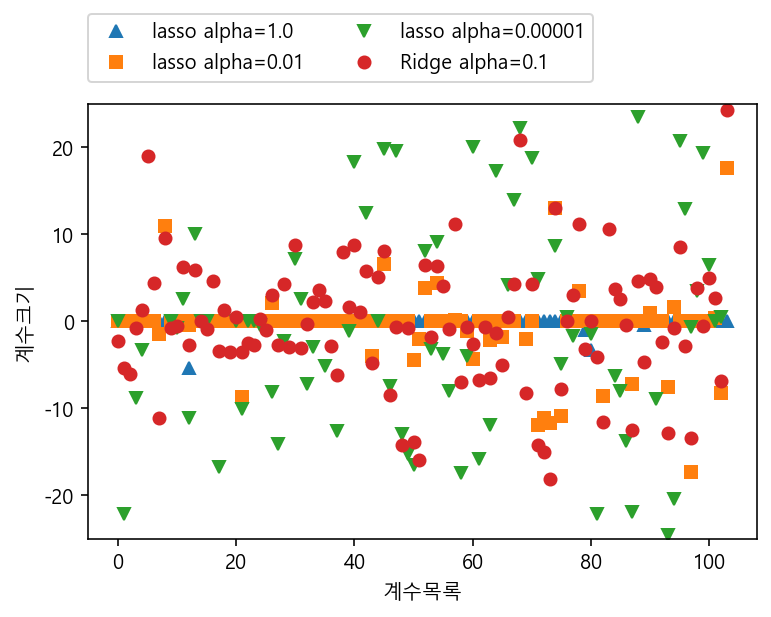

In [157]:
plt.plot(lasso.coef_, '^', label='lasso alpha=1.0')
plt.plot(lasso001.coef_, 's', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='lasso alpha=0.00001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.xlabel('계수목록')
plt.ylabel('계수크기')

plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05)) # legend의 위치 설정 : 2열, 그래프와의 거리

## 분류용 선형 모델

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

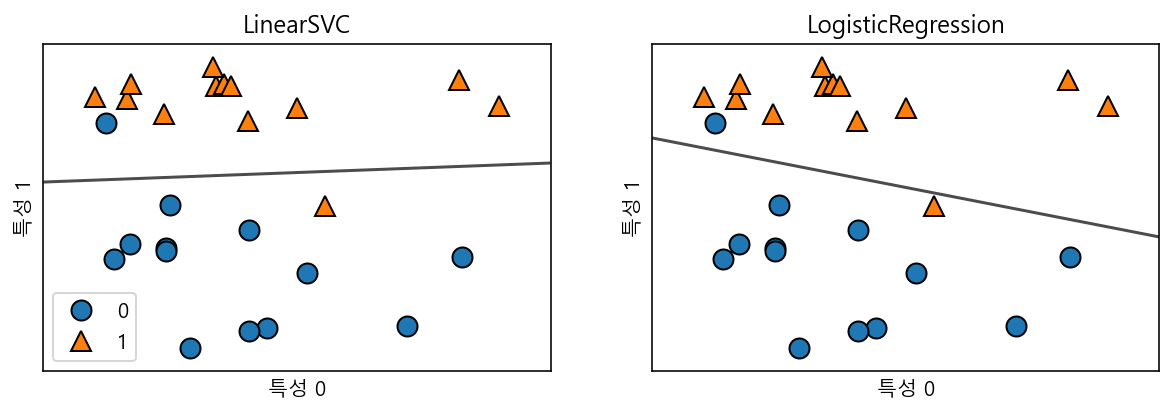

In [164]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

#### 분류용 선형 모델 86p~100p skip. 너무 어려움

-------------------------

## 2.3.5 결정 트리